In [18]:
import sys
sys.path.append('/Users/m/PTSA_NEW_GIT/')
sys.path.append('/Users/m/src/morlet_git_install')
import morlet
from scipy.stats import describe
import numpy as np
from ptsa.data.filters.MorletWaveletFilter import MorletWaveletFilter
from ptsa.data.TimeSeriesX import TimeSeriesX

In [19]:
num_freqs = 8
max_frequency = 60.0
morlet_transform = morlet.MorletWaveletTransform()
morlet_transform.init(5, 3.0, max_frequency, num_freqs, 1000, 4096)


In [20]:
samplerate = 1000.
frequency = 60.0
modulation_frequency = 80.0

duration = 4.096

n_points = int(np.round(duration*samplerate))
x = np.arange(n_points, dtype=np.float)
signal = np.sin(x*(2*np.pi*frequency/samplerate))-np.cos(x*(2*np.pi*frequency/samplerate))

# y_mod = np.sin(x*(2*np.pi*frequency/n_points))* np.sin(x*(2*np.pi*modulation_frequency/n_points))


In [21]:
powers=np.empty(shape=(signal.shape[0]*num_freqs,), dtype=np.float)
num_of_iterations = 100
# for i in xrange(num_of_iterations):
#     morlet_transform.multiphasevec(signal,powers)
morlet_transform.multiphasevec(signal,powers)

powers = powers.reshape(8,powers.shape[0]/8) 
                      

DescribeResult(nobs=100, minmax=(23484.831896585401, 23488.066816611958), mean=23486.443825364695, variance=1.3304506499355491, skewness=-1.064335473890851e-11, kurtosis=-1.5000000000022633)

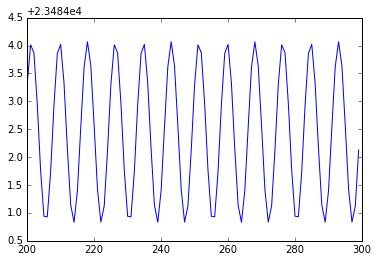

In [22]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

r_min=200
r_max=300


# plt.plot(x[r_min:r_max],signal[r_min:r_max])
plt.plot(x[r_min:r_max],powers[7,r_min:r_max])
describe(powers[7,r_min:r_max])

In [23]:
ts = TimeSeriesX(signal, dims=['time'], coords=[x])
ts['samplerate']=samplerate
ts.attrs['samplerate'] = samplerate

In [24]:
wf = MorletWaveletFilter(time_series=ts,
                         freqs=np.array([frequency]),
                         output='both',
                         frequency_dim_pos=0,
                         verbose=True
                         )

pow_wavelet, phase_wavelet = wf.filter()

total time wavelet loop:  0.000823020935059


DescribeResult(nobs=100, minmax=(23167.775, 23172.553), mean=23170.162, variance=2.8934696, skewness=0.005027940031141043, kurtosis=-1.5003256359266322)

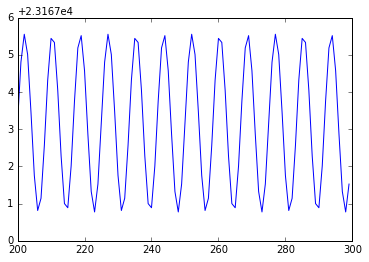

In [25]:
# plt.plot(x[100:130],phase_wavelet[0,100:130])
plt.plot(x[r_min:r_max],pow_wavelet[0,r_min:r_max])
describe(pow_wavelet[0,r_min:r_max])

